In [13]:
pip install bertopic sentence-transformers


Note: you may need to restart the kernel to use updated packages.


In [14]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import pandas as pd


In [ ]:
from datasets import load_dataset
import numpy as np
import pandas as pd

# Set cache dir if needed
cache_dir = "./data_cache"

# Load the full training split
dataset = load_dataset(
    "climatebert/climate_sentiment",
    split="train",
    cache_dir=cache_dir
)


splits = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = splits["train"]

# Extract text and label arrays
train_texts = np.array(train_dataset["text"])
train_labels = np.array(train_dataset["label"])


df = pd.DataFrame({
    "text": train_texts,
    "label": train_labels
})

print(df.head())


                                                text  label
0  The probability of flooding up to 2050 is set ...      0
1  In 2019, we invested a total of R$ 72.4 millio...      2
2  The main impacts of the 4ºC scenario were: • P...      0
3  7. OUR R E SIL IE NCE T O CL IM AT E CH A NGE ...      0
4  We are Australia's largest corporate purchaser...      2


In [21]:
df_filtered = df[df["label"].isin([0, 2])]  # 0 = Risk, 2 = Opportunity
df_filtered["label_name"] = df_filtered["label"].map({0: "Risk", 2: "Opportunity"})
print(df_filtered["label_name"].value_counts())


label_name
Risk           269
Opportunity    202
Name: count, dtype: int64


In [22]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Use a light but powerful embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initialize and fit the BERTopic model
topic_model = BERTopic(embedding_model=embedding_model, language="english")

# Fit on the filtered text (Risk and Opportunity only)
topics, probs = topic_model.fit_transform(df_filtered["text"])

# Add the topics back to your DataFrame
df_filtered["topic"] = topics


In [23]:
# Split data by label
risk_df = df_filtered[df_filtered["label"] == 0]
opp_df = df_filtered[df_filtered["label"] == 2]

# Most common topics in risk
print("Top Risk Topics:")
print(risk_df["topic"].value_counts().head(5))

# Most common topics in opportunity
print("Top Opportunity Topics:")
print(opp_df["topic"].value_counts().head(5))

# View top words per topic
for topic_id in risk_df["topic"].value_counts().head(3).index:
    print(f"\nRisk Topic {topic_id}:\n", topic_model.get_topic(topic_id))

for topic_id in opp_df["topic"].value_counts().head(3).index:
    print(f"\nOpportunity Topic {topic_id}:\n", topic_model.get_topic(topic_id))


Top Risk Topics:
topic
 0    225
 1     34
-1      7
 2      3
Name: count, dtype: int64
Top Opportunity Topics:
topic
 1    177
 0     13
 2      8
-1      4
Name: count, dtype: int64

Risk Topic 0:
 [('and', 0.09597153834208672), ('the', 0.08646879014628071), ('to', 0.07450563846536487), ('of', 0.07010516285148624), ('in', 0.051601616037489695), ('risks', 0.04825381001647037), ('climate', 0.047904441400341974), ('risk', 0.042979261987935884), ('our', 0.04028971700581524), ('change', 0.03780843600078682)]

Risk Topic 1:
 [('the', 0.09350548948895057), ('in', 0.0725761861535874), ('to', 0.07174301195055849), ('of', 0.06929324326479108), ('and', 0.06665738441454946), ('for', 0.0375222366481882), ('energy', 0.03523961099007803), ('we', 0.03283242281205458), ('with', 0.031223729222566676), ('our', 0.029874949209631272)]

Risk Topic -1:
 [('the', 0.08783150444832269), ('and', 0.08454193919338937), ('to', 0.08326614344144459), ('of', 0.061689793984061436), ('sustainability', 0.0577937862569

In [27]:
pip install --upgrade nbformat


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Attempting uninstall: jupyter-core
    Found existing installation: jupyter-core 4.11.1
    Uninstalling jupyter-core-4.11.1:
      Successfully uninstalled jupyter-core-4.11.1
Note: you may need to restart the kernel to use updated packages.


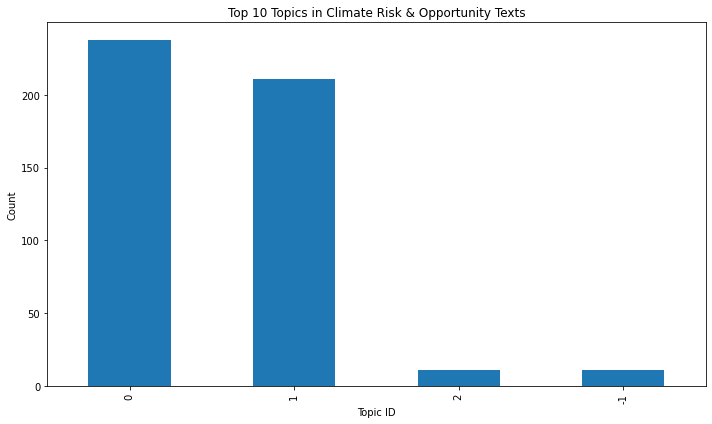

In [ ]:

import matplotlib.pyplot as plt

topic_counts = df_filtered["topic"].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
topic_counts.plot(kind="bar")
plt.title("Top 10 Topics in Climate Risk & Opportunity Texts")
plt.xlabel("Topic ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:


topic_model.visualize_barchart(top_n_topics=10)



topic_model.visualize_heatmap()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_and_the_to, 1_the_in_to, 2_electric_in_vehicles],
              'xaxis': 'x',
              'y': [0_and_the_to, 1_the_in_to, 2_electric_in_vehicles],
              'yaxis': 'y',
              'z': array([[1.        , 0.7006437 , 0.4751711 ],
                          [0.7006437 , 1.        , 0.63361746],
                          [0.4751711 , 0.63361746, 1.0000002 ]], dtype=float32)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Similarity Score'}},
                             'colorscale': [[0.0, 'rgb(247,252,240)'], [0.125,
                                            'rgb(224,243,219)'], [0.25,
                                            'rgb(204,235,197)'], [0.375,
                                            'rgb(168,221,181)'], [0.5,
                                            'rgb(123,204,196)'], [0.625,
                                            'rgb(78,179,211)'], [0.75,
                                            'rgb(43,140,190)'], [0.875,
                                            'rgb(8,104,172)'], [1.0,
                                            'rgb(8,64,129)']]},
               'height': 800,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'title': {'text': 'Trend'}},
               'margin': {'t': 60},
               'showlegend': True,
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Similarity Matrix</b>',
                         'x': 0.55,
                         'xanchor': 'center',
                         'y': 0.95,
                         'yanchor': 'top'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})

In [30]:
from umap import UMAP
from bertopic import BERTopic

umap_model = UMAP(n_neighbors=10, n_components=5, metric='cosine')

topic_model_v2 = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    min_topic_size=15
)

topics_v2, probs_v2 = topic_model_v2.fit_transform(df_filtered["text"])
df_filtered["topic_v2"] = topics_v2


In [33]:
df_filtered.to_csv("outputs2/task2.2_topics.csv", index=False)
topic_model.get_topic_info().to_csv("outputs2/topic_summary.csv", index=False)


In [ ]:
from umap import UMAP
from bertopic import BERTopic

# Define a custom UMAP model
umap_model = UMAP(n_neighbors=10, n_components=5, metric='cosine')

# Create a second BERTopic model with changed parameters
topic_model_v2 = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    min_topic_size=15,
    language="english"
)

# Fit model on same filtered dataset
topics_v2, probs_v2 = topic_model_v2.fit_transform(df_filtered["text"])

# Assign topics to the DataFrame
df_filtered["topic_v2"] = topics_v2

# View topic summary
topic_info_v2 = topic_model_v2.get_topic_info()
topic_info_v2.head()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,50,-1_the_and_in_to,"[the, and, in, to, of, our, for, on, electric,...",[Investec Limited banking book South Africa is...
1,0,225,0_and_the_to_of,"[and, the, to, of, in, risks, climate, risk, o...",[Physical risks from climate change arise from...
2,1,196,1_the_to_in_of,"[the, to, in, of, and, for, energy, we, with, ...",[Mobilizing private and institutional capital:...


In [37]:
print(topic_info_1.columns)


Index(['topic', 'count', 'name', 'representation', 'representative_docs'], dtype='object')


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(
    ngram_range=(1, 2),
    stop_words="english",  # removes 'the', 'and', 'to', etc.
    min_df=5
)

topic_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    language="english",
    calculate_probabilities=True
)


In [49]:
topics, probs = topic_model.fit_transform(df_filtered["text"])
df_filtered["topic"] = topics


In [50]:
df_filtered["text"].sample(5).values


array(['Climate-related physical risks are those risks resulting from climate change, which involve event-driven (acute) or longer-term (chronic) shifts in climate patterns. Acute physical risks refer to those that are event-driven, including increased severity of extreme weather events such as cyclones, hurricanes or floods. Chronic physical risks refer to longer-term shifts in climate patterns (e.g., sustained higher temperatures) that may cause sea level rise or chronic heat waves.',
       'Santander has set a number of targets on climate change. In relation to commercial activity we have set a green finance target to raise and facilitate 120Bn euros between 2019 and 2025 and 220Bn euros between 2019 and 2030. This includes Santander overall contribution to green finance: project finance, syndicated loans, green bonds, capital finance, export finance, advisory and other products to help our clients in the transition to a low carbon economy.',
       'We remain at the forefront of S

In [51]:
embedding_model = SentenceTransformer("paraphrase-MiniLM-L12-v2")


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from bertopic import BERTopic

vectorizer_model = CountVectorizer(
    ngram_range=(1, 2),
    stop_words="english",
    min_df=2  # Or even 1 if you're below ~100 docs
)


# Custom UMAP for more nuanced topic separation
umap_model = UMAP(n_neighbors=10, n_components=5, metric='cosine')

# Improved variation
topic_model_v2 = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    umap_model=umap_model,
    min_topic_size=10,
    calculate_probabilities=True
)

# Fit and assign
topics_v2, probs_v2 = topic_model_v2.fit_transform(df_filtered["text"])
df_filtered["topic_v2"] = topics_v2


In [55]:
# No need to lowercase anymore if column is 'Count'
comparison = pd.DataFrame({
    "Model": ["Variation 1", "Variation 2"],
    "Num Topics": [len(topic_info_1), len(topic_info_2)],
    "Top Topic Size": [topic_info_1['count'].max(), topic_info_2['count'].max()],
    "Top Topic Words": [
        ", ".join([word for word, _ in topic_model.get_topic(0)[:5]]),
        ", ".join([word for word, _ in topic_model_v2.get_topic(0)[:5]])
    ]
})

comparison


,Model,Num Topics,Top Topic Size,Top Topic Words
0,Variation 1,3,238,"climate, change, climate change, impacts, busi..."
1,Variation 2,2,225,"risks, climate, risk, change, climate change"


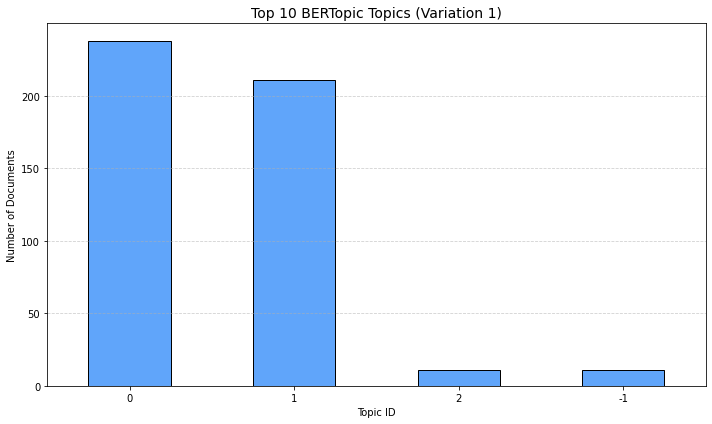

In [43]:
import matplotlib.pyplot as plt

# Count topic frequency from Variation 1
topic_counts = df_filtered["topic"].value_counts().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
topic_counts.plot(kind="bar", color="#60a5fa", edgecolor="black")
plt.title("Top 10 BERTopic Topics (Variation 1)", fontsize=14)
plt.xlabel("Topic ID")
plt.ylabel("Number of Documents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


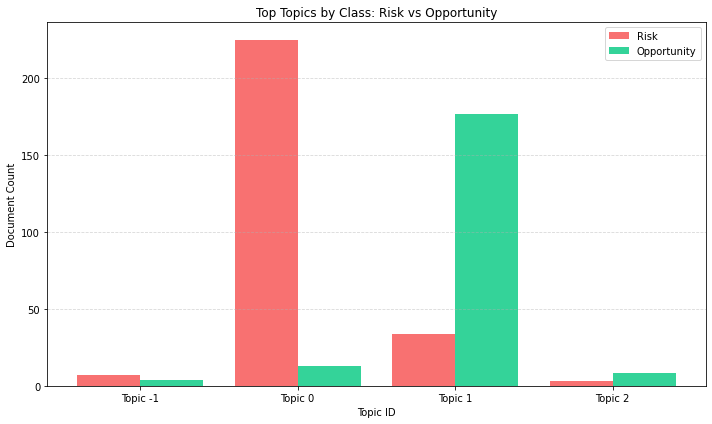

In [44]:
import matplotlib.pyplot as plt

# Count topic frequency by class
risk_counts = df_filtered[df_filtered["label"] == 0]["topic"].value_counts().head(5)
opp_counts = df_filtered[df_filtered["label"] == 2]["topic"].value_counts().head(5)

# Align indexes to union of topics
all_topics = sorted(set(risk_counts.index).union(opp_counts.index))
risk_freqs = [risk_counts.get(topic, 0) for topic in all_topics]
opp_freqs = [opp_counts.get(topic, 0) for topic in all_topics]

# Plot
x = range(len(all_topics))
bar_width = 0.4

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], risk_freqs, width=bar_width, label="Risk", color="#f87171")
plt.bar([i + bar_width/2 for i in x], opp_freqs, width=bar_width, label="Opportunity", color="#34d399")

plt.xticks(ticks=x, labels=[f"Topic {i}" for i in all_topics])
plt.title("Top Topics by Class: Risk vs Opportunity")
plt.xlabel("Topic ID")
plt.ylabel("Document Count")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [45]:
pip install wordcloud


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


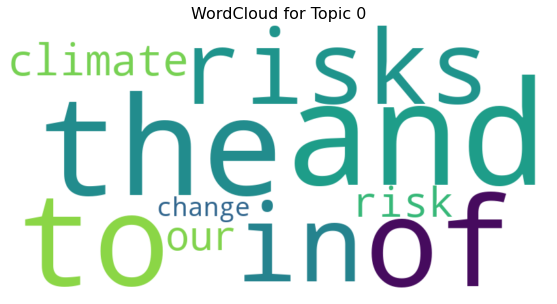

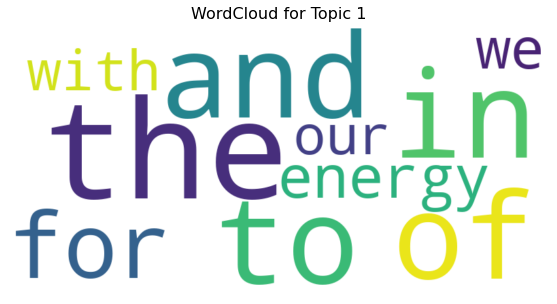

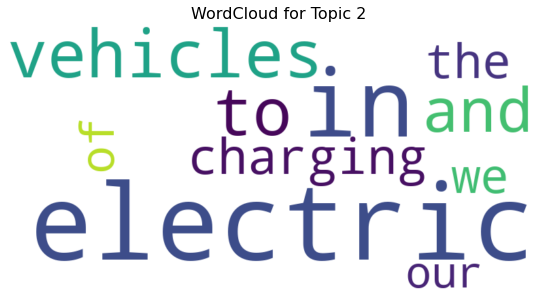

In [46]:
from wordcloud import WordCloud

# Create WordClouds for top 3 topics in variation 1
top_topic_ids = df_filtered["topic"].value_counts().head(3).index

for topic_id in top_topic_ids:
    words_freq = dict(topic_model.get_topic(topic_id))
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wordcloud.generate_from_frequencies(words_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for Topic {topic_id}", fontsize=16)
    plt.show()


In [42]:
comparison.to_csv("outputs2/topic_variation_comparison.csv", index=False)


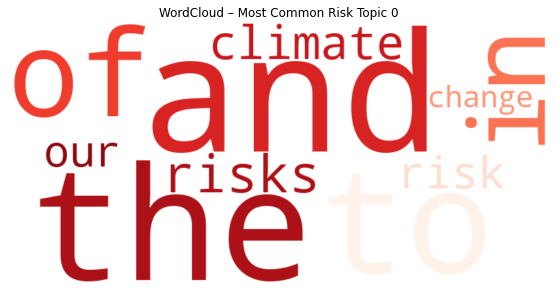

In [47]:
# For a risk-specific topic
risk_topic_id = df_filtered[df_filtered["label"] == 0]["topic"].value_counts().idxmax()
words_freq = dict(topic_model.get_topic(risk_topic_id))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds')
wordcloud.generate_from_frequencies(words_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"WordCloud – Most Common Risk Topic {risk_topic_id}")
plt.show()
